# Internation Men's Football Matches Analysis

The dataset for this project is available at Kaggle. It contains all the international men's matches from 1872 to 2020. In this project, various statistics are going to be analysed like who has played most matches, who has played most matches in world cup, who has scored in most matches, who has scored most goals, who has conceded most goals,etc.

##### Numpy, Pandas, Seaborn and Matplotlib are used to clean and refine the data, analyse and visualize the information.

In [1]:
project_name = "international men's football analysis"

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## Data Preparation and Cleaning

- Format the dates in proper formatting

In [38]:
import numpy as np

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
football_df = pd.read_csv('results.csv')

In [41]:
football_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41635,08-09-2020,Luxembourg,Montenegro,0,1,UEFA Nations League,Luxembourg City,Luxembourg,False
41636,08-09-2020,Cyprus,Azerbaijan,0,1,UEFA Nations League,Nicosia,Cyprus,False
41637,08-09-2020,Armenia,Estonia,2,0,UEFA Nations League,Yerevan,Armenia,False
41638,08-09-2020,Georgia,North Macedonia,1,1,UEFA Nations League,Tbilisi,Georgia,False


As we can see that the date formatting is different for some dates, so we need to correct the date formatting and set the date column as date so as to perform some date operations on the same.

In [42]:
football_df.date = pd.to_datetime(football_df.date)
football_df["month"] = pd.DatetimeIndex(football_df.date).month
football_df["year"] = pd.DatetimeIndex(football_df.date).year

In [43]:
football_df.date

0       1872-11-30
1       1873-03-08
2       1874-03-07
3       1875-03-06
4       1876-03-04
           ...    
41635   2020-08-09
41636   2020-08-09
41637   2020-08-09
41638   2020-08-09
41639   2020-08-09
Name: date, Length: 41640, dtype: datetime64[ns]

Adding winning team to the dataset

In [44]:
conditions = [
    (football_df['home_score']-football_df['away_score'] > 0),
    (football_df['home_score']-football_df['away_score'] < 0),
    (football_df['home_score']-football_df['away_score'] == 0)
    ]

values1 = [football_df['home_team'],football_df['away_team'],"Draw"]
values2 = [football_df['away_team'],football_df['home_team'],"Draw"]
football_df['winning_team'] = np.select(conditions,values1)
football_df['losing_team'] = np.select(conditions,values2)

In [45]:
football_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year,winning_team,losing_team
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,11,1872,Draw,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,3,1873,England,Scotland
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1874,Scotland,England
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,3,1875,Draw,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1876,Scotland,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41635,2020-08-09,Luxembourg,Montenegro,0,1,UEFA Nations League,Luxembourg City,Luxembourg,False,8,2020,Montenegro,Luxembourg
41636,2020-08-09,Cyprus,Azerbaijan,0,1,UEFA Nations League,Nicosia,Cyprus,False,8,2020,Azerbaijan,Cyprus
41637,2020-08-09,Armenia,Estonia,2,0,UEFA Nations League,Yerevan,Armenia,False,8,2020,Armenia,Estonia
41638,2020-08-09,Georgia,North Macedonia,1,1,UEFA Nations League,Tbilisi,Georgia,False,8,2020,Draw,Draw


In [46]:
import jovian

In [47]:
jovian.commit(project= project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/shreylimbani/international-mens-football-analysis


'https://jovian.ml/shreylimbani/international-mens-football-analysis'

## Exploratory Analysis and Visualization

- Most Matches Played(Country) 
- Most Matches Won
- Most Matches Lost 
- Most Goals Scored (Country) 
- Most Goals Conceded 
- Most Home Matches Played 
- Most Away Matches Played 
- Most Matches Played In A World Cup 
- Most Matches Won In A World Cup
- Most Matches Lost In A World Cup 
- Most Goals Scored (World Cup)
- Most Matches Played(Year) - with a graph
- Most Goals Scored (Year) - with a graph



In [48]:
matches_played_country = football_df.groupby('home_team')["date"].count() + football_df.groupby('away_team')["date"].count()
matches_played_country

Abkhazia          28.0
Afghanistan      111.0
Albania          334.0
Alderney          19.0
Algeria          505.0
                 ...  
Yugoslavia       480.0
Zambia           718.0
Zanzibar         205.0
Zimbabwe         456.0
Åland Islands     46.0
Name: date, Length: 312, dtype: float64

In [49]:
matches_played_country.sort_values(ascending=False).head(1)

Sweden    1020.0
Name: date, dtype: float64

As we can see that Sweden has played most number of interational matches that is 1020.

In [50]:
home_matches_played_country = football_df[football_df.neutral == False].groupby('home_team')["date"].count()
home_matches_played_country.sort_values(ascending=False)

home_team
Sweden           451
England          446
France           433
Hungary          422
Germany          416
                ... 
Palau              1
Madrid             1
Micronesia         1
Cascadia           1
Central Spain      1
Name: date, Length: 266, dtype: int64

Sweden has played most matches at a home venue with 451 matches.

In [51]:
away_matches_played_country = football_df[football_df.neutral == False].groupby('away_team')["date"].count()
away_matches_played_country.sort_values(ascending=False)

away_team
Sweden                462
England               458
Hungary               445
Finland               391
Germany               385
                     ... 
Romani people           1
Saare County            1
Barawa                  1
Saint Helena            1
Parishes of Jersey      1
Name: date, Length: 295, dtype: int64

Sweden has played most matches at an away venue with 462 matches.

Most matches won by a team

In [52]:
matches_won_country = football_df.groupby('winning_team')["date"].count()
matches_won_country.sort_values(ascending=False)

winning_team
Draw             9592
Brazil            625
England           573
Germany           555
Argentina         526
                 ... 
Central Spain       1
Saarland            1
Surrey              1
San Marino          1
Gozo                1
Name: date, Length: 301, dtype: int64

From the above data we get to know that Brazil has won the most number of matches and 9592 matches have ended in a draw.

Most Matches Lost by a Country

In [53]:
matches_lost_country = football_df.groupby('losing_team')["date"].count()
matches_lost_country.sort_values(ascending=False)

losing_team
Draw                  9592
Finland                401
Switzerland            345
Northern Ireland       333
Norway                 329
                      ... 
Andalusia                1
Canary Islands           1
Parishes of Jersey       1
Yorkshire                1
Madrid                   1
Name: date, Length: 311, dtype: int64

Apparently Finland has lost the most number of international mathces.

In [54]:
goals_scored_country = football_df.groupby('home_team')["home_score"].sum() + football_df.groupby('away_team')["away_score"].sum()
goals_scored_country.sort_values(ascending=False)

England                  2209.0
Brazil                   2149.0
Germany                  2126.0
Sweden                   2015.0
Hungary                  1889.0
                          ...  
Republic of St. Pauli       NaN
Silesia                     NaN
Surrey                      NaN
Two Sicilies                NaN
Western Australia           NaN
Length: 312, dtype: float64

These are the top 5 goalscoring countries of all time
- England -                 2209.0
- Brazil   -                2149.0
- Germany   -               2126.0
- Sweden     -              2015.0
- Hungary     -             1889.0

In [55]:
goals_conceded_country = football_df.groupby('home_team')["away_score"].sum() + football_df.groupby('away_team')["home_score"].sum()
goals_conceded_country.sort_values(ascending=False)

Finland                  1564.0
Hungary                  1389.0
Switzerland              1342.0
Norway                   1338.0
Sweden                   1308.0
                          ...  
Republic of St. Pauli       NaN
Silesia                     NaN
Surrey                      NaN
Two Sicilies                NaN
Western Australia           NaN
Length: 312, dtype: float64

These teams have conceded the most goals 
* Finland
* Switzerland
* Norway
* Hungary

Let us find out which team has scored most average goals per match??

In [56]:
average_goal_per_match_country = goals_scored_country / matches_played_country
average_goal_per_match_country.sort_values(ascending=False)

Yorkshire                3.857143
Parishes of Jersey       3.666667
Cascadia                 3.285714
Sápmi                    3.230769
Isle of Man              3.183673
                           ...   
Republic of St. Pauli         NaN
Silesia                       NaN
Surrey                        NaN
Two Sicilies                  NaN
Western Australia             NaN
Length: 312, dtype: float64

In [57]:
world_cup_df = football_df[football_df.tournament == "FIFA World Cup"]
world_cup_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year,winning_team,losing_team
1304,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,7,1930,United States,Belgium
1305,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,7,1930,France,Mexico
1306,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,7,1930,Yugoslavia,Brazil
1307,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,7,1930,Romania,Peru
1308,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,7,1930,Argentina,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39945,2018-07-07,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False,7,2018,Draw,Draw
39946,2018-10-07,France,Belgium,1,0,FIFA World Cup,St. Petersburg,Russia,True,10,2018,France,Belgium
39947,2018-11-07,Croatia,England,2,1,FIFA World Cup,Moscow,Russia,True,11,2018,Croatia,England
39948,2018-07-14,Belgium,England,2,0,FIFA World Cup,St. Petersburg,Russia,True,7,2018,Belgium,England


In [58]:
matches_played_country_world_cup = world_cup_df.groupby('home_team')["home_score"].count() + world_cup_df.groupby('away_team')["away_score"].count()
matches_played_country_world_cup.sort_values(ascending=False)

Germany      109.0
Brazil       109.0
Italy         83.0
Argentina     81.0
England       69.0
             ...  
Cuba           NaN
Indonesia      NaN
Israel         NaN
Kuwait         NaN
Wales          NaN
Length: 81, dtype: float64

Both Germany and Brazil have played most matches in the FIFA World Cup with a total count of 109.

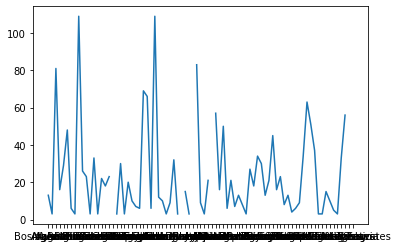

In [59]:
plt.plot(matches_played_country_world_cup)

This is the distribution of matches played by different countries in the World Cup

<BarContainer object of 21 artists>

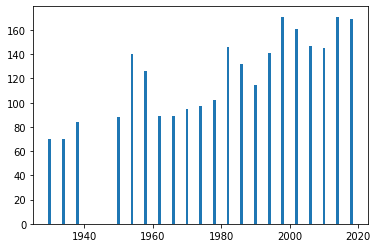

In [60]:
world_cup_year_df = world_cup_df.groupby('year')[['home_score','away_score']].sum()
world_cup_year_df['total_goals_scored'] = world_cup_year_df.home_score + world_cup_year_df.away_score
world_cup_year_df
plt.bar(world_cup_year_df.index,world_cup_year_df.total_goals_scored)

The bar shows that the number of goals scored per tournament was increasing during its early years and after 1996 the number of goals scored are found to be in between 140 and 170.
The reason for this change is the increase in the number of matches played during each of these tournaments.

HeatMap for goals scored for every month for a period of last 10 years.

In [97]:
goals_per_month_df = football_df[(football_df.year>2010) & (football_df.year<=2020)].groupby(["month","year"], as_index=False)[["home_score","away_score"]].sum()
goals_per_month_df["total_goals"] = goals_per_month_df.home_score+goals_per_month_df.away_score
goals_per_month_df
goals_per_month = goals_per_month_df.pivot(index='month', columns='year', values='total_goals')
goals_per_month

year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
month,,,,,,,,,,
1,173.0,189.0,143.0,176.0,167.0,208.0,183.0,113.0,95.0,3.0
2,211.0,325.0,76.0,58.0,44.0,91.0,80.0,83.0,80.0,NaN
3,407.0,94.0,341.0,91.0,412.0,560.0,366.0,409.0,380.0,20.0
4,89.0,55.0,79.0,93.0,53.0,128.0,107.0,50.0,76.0,18.0
5,184.0,256.0,102.0,437.0,182.0,315.0,254.0,180.0,212.0,19.0
6,367.0,163.0,444.0,264.0,487.0,367.0,390.0,200.0,452.0,20.0
7,411.0,210.0,275.0,138.0,115.0,114.0,268.0,120.0,286.0,29.0
8,202.0,289.0,230.0,115.0,238.0,178.0,195.0,115.0,187.0,22.0
9,170.0,264.0,81.0,84.0,86.0,93.0,131.0,105.0,142.0,1.0


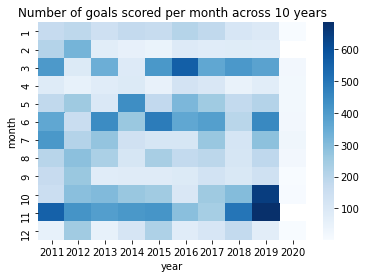

In [102]:
plt.title("Number of goals scored per month across 10 years")
sns.heatmap(goals_per_month, cmap='Blues')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 7., 20., 72., 92., 66., 23.,  9.,  7.,  3.,  2.]),
 array([0.        , 0.38571429, 0.77142857, 1.15714286, 1.54285714,
        1.92857143, 2.31428571, 2.7       , 3.08571429, 3.47142857,
        3.85714286]),
 <a list of 10 Patch objects>)

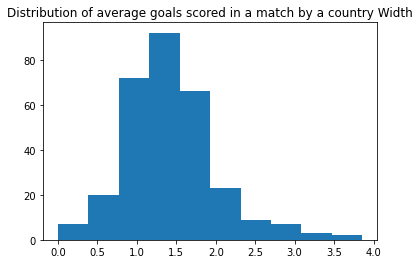

In [103]:
plt.title('Distribution of average goals scored in a match by a country Width')
plt.hist(average_goal_per_match_country)

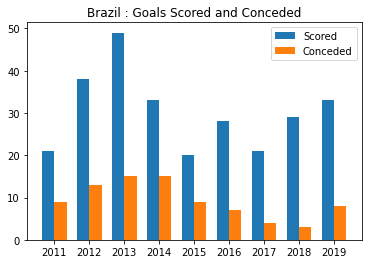

In [124]:
brazil_home_goals_df = football_df[((football_df.home_team=="Brazil")) & ((football_df.year>2010) & (football_df.year<=2020))].groupby("year", as_index=False)[["home_score","away_score"]].sum()
brazil_home_goals_df.columns = ["year","goals_scored","goals_conceded"]
brazil_away_goals_df = football_df[((football_df.away_team=="Brazil")) & ((football_df.year>2010) & (football_df.year<=2020))].groupby("year", as_index=False)[["away_score","home_score"]].sum()
brazil_away_goals_df.columns = ["year","goals_scored","goals_conceded"]
brazil_goals_df = brazil_home_goals_df + brazil_away_goals_df
brazil_goals_df.year = brazil_goals_df.year//2
brazil_goals_df

plt.title('Brazil : Goals Scored and Conceded')
ind = np.arange(9) 
width = 0.35

plt.bar(ind, brazil_goals_df.goals_scored, width, label="Scored")
plt.bar(ind+width, brazil_goals_df.goals_conceded, width, label="Conceded")

plt.xticks(ind + width / 2, brazil_goals_df.year)
plt.legend(loc='best')
plt.show()

In [125]:
import jovian

In [126]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/shreylimbani/international-mens-football-analysis


'https://jovian.ml/shreylimbani/international-mens-football-analysis'

## Asking and Answering Questions


Well the most obvious question about the history of football are:
 - Which team has won most number of matches?
 - Which team has scored most number of goals?
 - Which team has played the most matches till date?

In [128]:
matches_played_country.sort_values(ascending = False).head(15)

Sweden         1020.0
England        1011.0
Brazil          981.0
Argentina       980.0
Germany         951.0
Hungary         930.0
Uruguay         884.0
Mexico          869.0
South Korea     862.0
France          842.0
Poland          817.0
Norway          806.0
Italy           802.0
Switzerland     799.0
Denmark         797.0
Name: date, dtype: float64

In [129]:
goals_scored_country.sort_values(ascending=False).head(10)

England        2209.0
Brazil         2149.0
Germany        2126.0
Sweden         2015.0
Hungary        1889.0
Argentina      1830.0
Netherlands    1619.0
Mexico         1514.0
South Korea    1512.0
France         1498.0
dtype: float64

In [130]:
matches_won_country.sort_values(ascending=False).head(10)

winning_team
Draw           9592
Brazil          625
England         573
Germany         555
Argentina       526
Sweden          500
South Korea     454
Mexico          439
Hungary         435
Italy           424
Name: date, dtype: int64

So from the above three sets of values, we can provide answers to the question asked : 
- Most Matches Played: Sweden(1020)
- Most Goals Scored: England(2209)
- Most Wins: Brazil(625)

Case Study of Brazil's matches (2011-2019):

> - Average Goals Scored Per Year - ?
- Average Goals Conceded Per Year - ?


In [133]:
brazil_goals_df[["goals_scored","goals_conceded"]].describe()

,goals_scored,goals_conceded
count,9.000000,9.000000
mean,30.222222,9.222222
std,9.417773,4.381146
min,20.000000,3.000000
25%,21.000000,7.000000
50%,29.000000,9.000000
75%,33.000000,13.000000
max,49.000000,15.000000


This data is applicable only to the matches played between 2011 and 2019.

 - Average Number of goals scored per year : 30.2
 - Average Number of goals conceded per year : 9.2
 - Min number of goals scored in a year : 20
 - Min number of goals conceded in a year : 3
 - Max number of goals scored in a year : 49
 - Max number of goals conceded in a year : 15
 

Now we are ready to discuss a few statistics about the matches played in the Fifa World Cup. 

- How many countries have participated in the world cup?
- Which team has played most number of matches in the world cup?
- In which world cup were most number of goals scored?

In [148]:
matches_played_country_world_cup

Algeria                 13.0
Angola                   3.0
Argentina               81.0
Australia               16.0
Austria                 29.0
                        ... 
United Arab Emirates     3.0
United States           33.0
Uruguay                 56.0
Wales                    NaN
Yugoslavia              33.0
Length: 81, dtype: float64

In [147]:
matches_played_country_world_cup.sort_values(ascending=False).head(10)

Germany      109.0
Brazil       109.0
Italy         83.0
Argentina     81.0
England       69.0
France        66.0
Spain         63.0
Mexico        57.0
Uruguay       56.0
Sweden        51.0
dtype: float64

In [154]:
world_cup_year_df[["year","total_goals_scored"]].sort_values("total_goals_scored",ascending=False)

,year,total_goals_scored
19,2014,171
15,1998,171
20,2018,169
16,2002,161
17,2006,147
11,1982,146
18,2010,145
14,1994,141
4,1954,140
12,1986,132


World Cup Stats:
- Total Number of Participating Countries : 81
- Most Matches Played : Germany and Brazil (109)
- Most Goals Scored in a Edition : 1998 and 2014 (171)


In [155]:
import jovian

In [156]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: Please provide the project argument e.g. jovian.commit(project='my-project')


## Inferences and Conclusion

In this project I have performed data analysis on the data of all the international men's football matches from 1870's to 2020. After performing this analysis, I got to learn various information or statistics that I never knew before.
I would list them down here:
 - The first ever international football match was played between England and Scotland on 30th Nov 1872 and the match was won by Scotland.

 - The Fifa World Cup started from 1930 in Uruguay. During the second world war the world cup did not take place. After the world war the world cup has taken place after every four years.

 - In the last 10 years, the maximum number of goals have scored in the months of March, June and November.

 - The average goal scored per match by most countries lies in the range of 0.7 to 1.8.

 - I also performed a case study on the goals aspect for the Brazilian National Team during the years(2011-2019). These were my observations
  - Average Number of goals scored per year : 30.2
  - Average Number of goals conceded per year : 9.2
  - Min number of goals scored in a year : 20
  - Min number of goals conceded in a year : 3
  - Max number of goals scored in a year : 49
  - Max number of goals conceded in a year : 15

I would like to conclude that after performing this data analysis:
- I got to learn how to do a data analysis on any type dataset. 
- What are the requirements and how to approach.

In [157]:
import jovian

In [ ]:
jovian.commit(project = project_name)

## References and Future Work

TODO

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
